
Проведен разведочный анализ данных. Проанализированы данные о том, какие фильмы были лучшими по metascore, по рейтингу IMDb, на основе голосов зрителей и какие фильмы были самими кассовыми в 2018-2019г. Также, все данные были визуализированы.

# Описание данных

Датасет содержит:

* Unnamed: 0 - индекс;
* movie_name - название фильма;
* genre - жанр фильма;
* year - год выхода в прокат;
* timeMin - длительность фильма;
* imdb - оценка IMBb;
* metascore - оценка Metacritic;
* votes - количество голосов;
* us_grossMillions - кассовые сборы в США.

## **1. Загрузка и предобработка данных.**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [31]:
url = 'https://raw.githubusercontent.com/vergarrra/analysis_of_movies/main/movies_IMDB.csv'

movies = pd.read_csv(url)
movies.head()

,Unnamed: 0,movie_name,genre,year,timeMin,imdb,metascore,votes,us_grossMillions
0,0,The Gentlemen,"Action, Comedy, Crime",2019,113,8.0,51.0,103248,69.043713
1,1,Once Upon a Time... in Hollywood,"Comedy, Drama",2019,161,7.7,83.0,439202,142.500000
2,2,Parasite,"Comedy, Drama, Thriller",2019,132,8.6,96.0,367763,53.370000
3,3,Knives Out,"Comedy, Crime, Drama",2019,131,8.0,82.0,272176,165.360000
4,4,1917,"Drama, War",2019,119,8.4,78.0,278731,159.230000


In [32]:
movies.drop(columns=['Unnamed: 0'], inplace=True)
movies.head()

,movie_name,genre,year,timeMin,imdb,metascore,votes,us_grossMillions
0,The Gentlemen,"Action, Comedy, Crime",2019,113,8.0,51.0,103248,69.043713
1,Once Upon a Time... in Hollywood,"Comedy, Drama",2019,161,7.7,83.0,439202,142.500000
2,Parasite,"Comedy, Drama, Thriller",2019,132,8.6,96.0,367763,53.370000
3,Knives Out,"Comedy, Crime, Drama",2019,131,8.0,82.0,272176,165.360000
4,1917,"Drama, War",2019,119,8.4,78.0,278731,159.230000


In [33]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1000.0,1991.148000,22.915655,1920.0,1976.000,1998.500000,2009.000000,2019.00
timeMin,1000.0,122.536000,28.311345,45.0,102.000,119.000000,136.000000,321.00
imdb,1000.0,7.940500,0.278257,7.5,7.700,7.900000,8.100000,9.30
metascore,1000.0,77.511377,11.413628,28.0,72.000,77.511377,85.000000,100.00
votes,1000.0,263938.768000,310307.939627,25047.0,55087.750,137866.000000,362433.250000,2220730.00
us_grossMillions,1000.0,69.043713,100.098884,0.0,5.495,42.390000,69.043713,936.66


## **2. Разведочный анализ данных.**

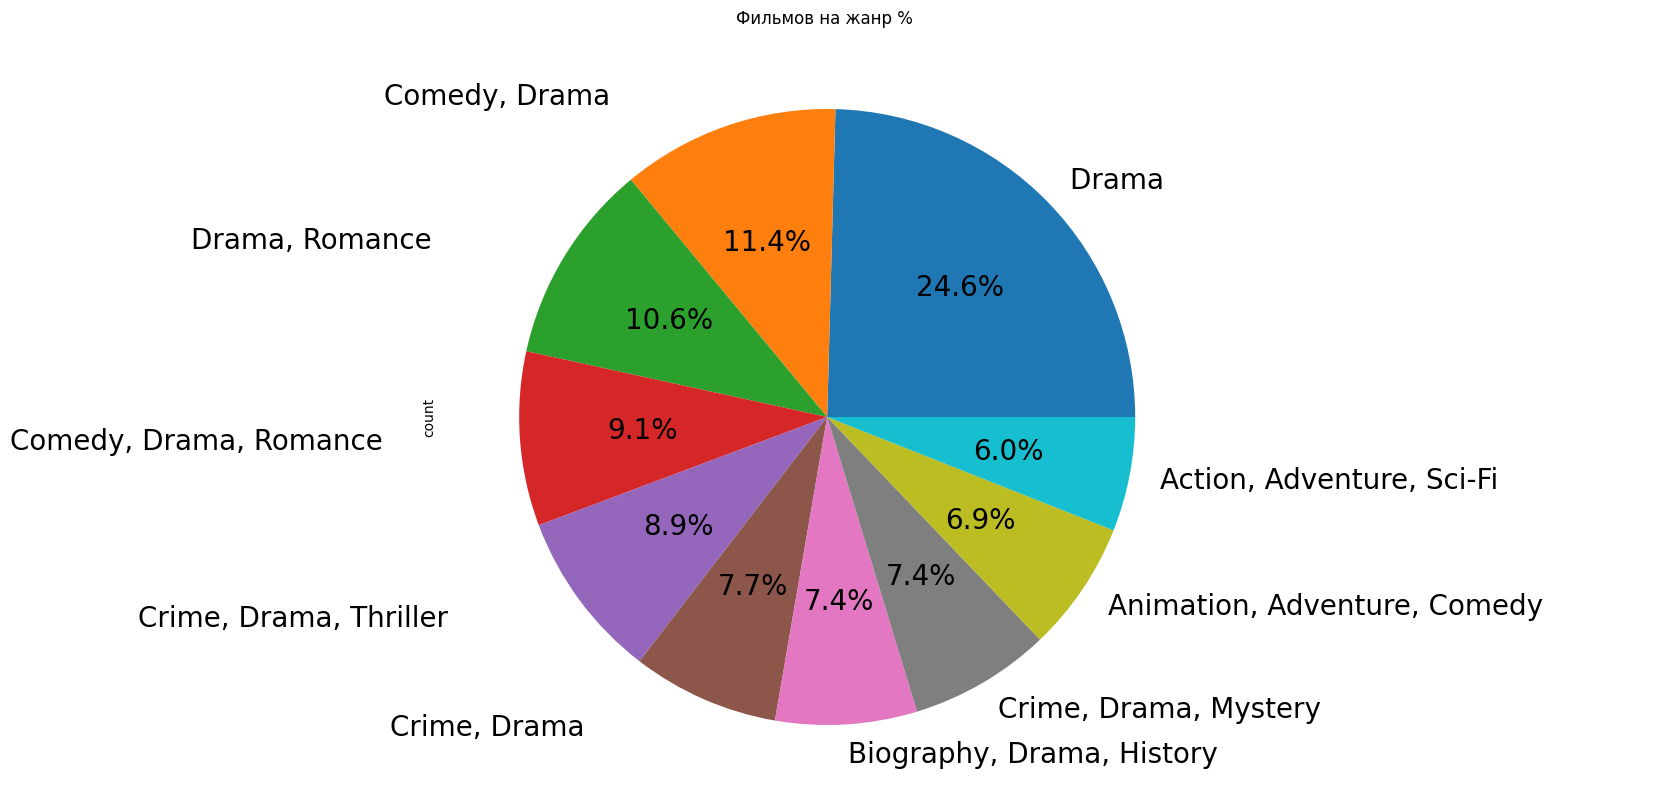

In [34]:
movies['genre'].value_counts().nlargest(10).plot(kind='pie', title='Фильмов на жанр % ', figsize=(10,10), autopct='%1.1f%%',fontsize=20)
sns.despine()


Глядя на пайчарт мы видим, что жанр Drama преобладает над остальными

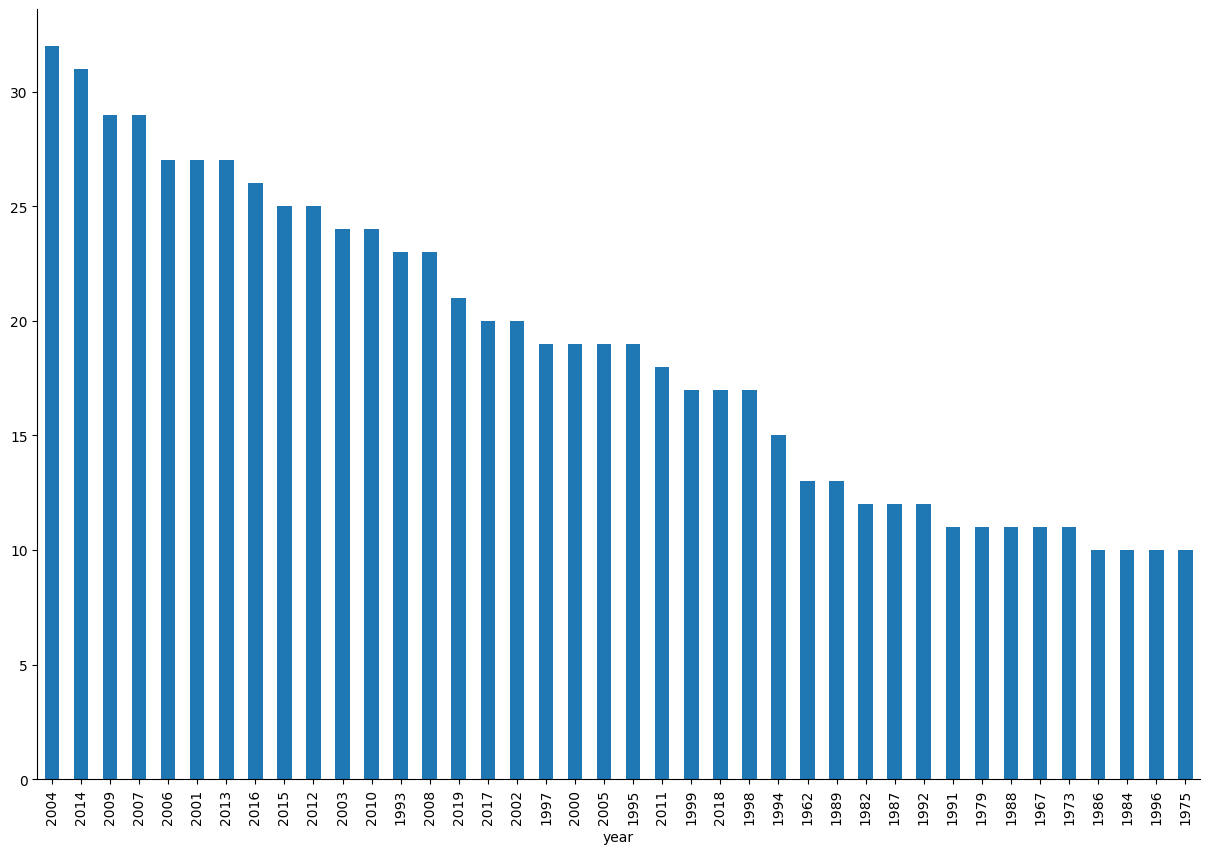

In [35]:
movies['year'].value_counts().nlargest(40).plot(kind='bar',  figsize=(15,10))
sns.despine()

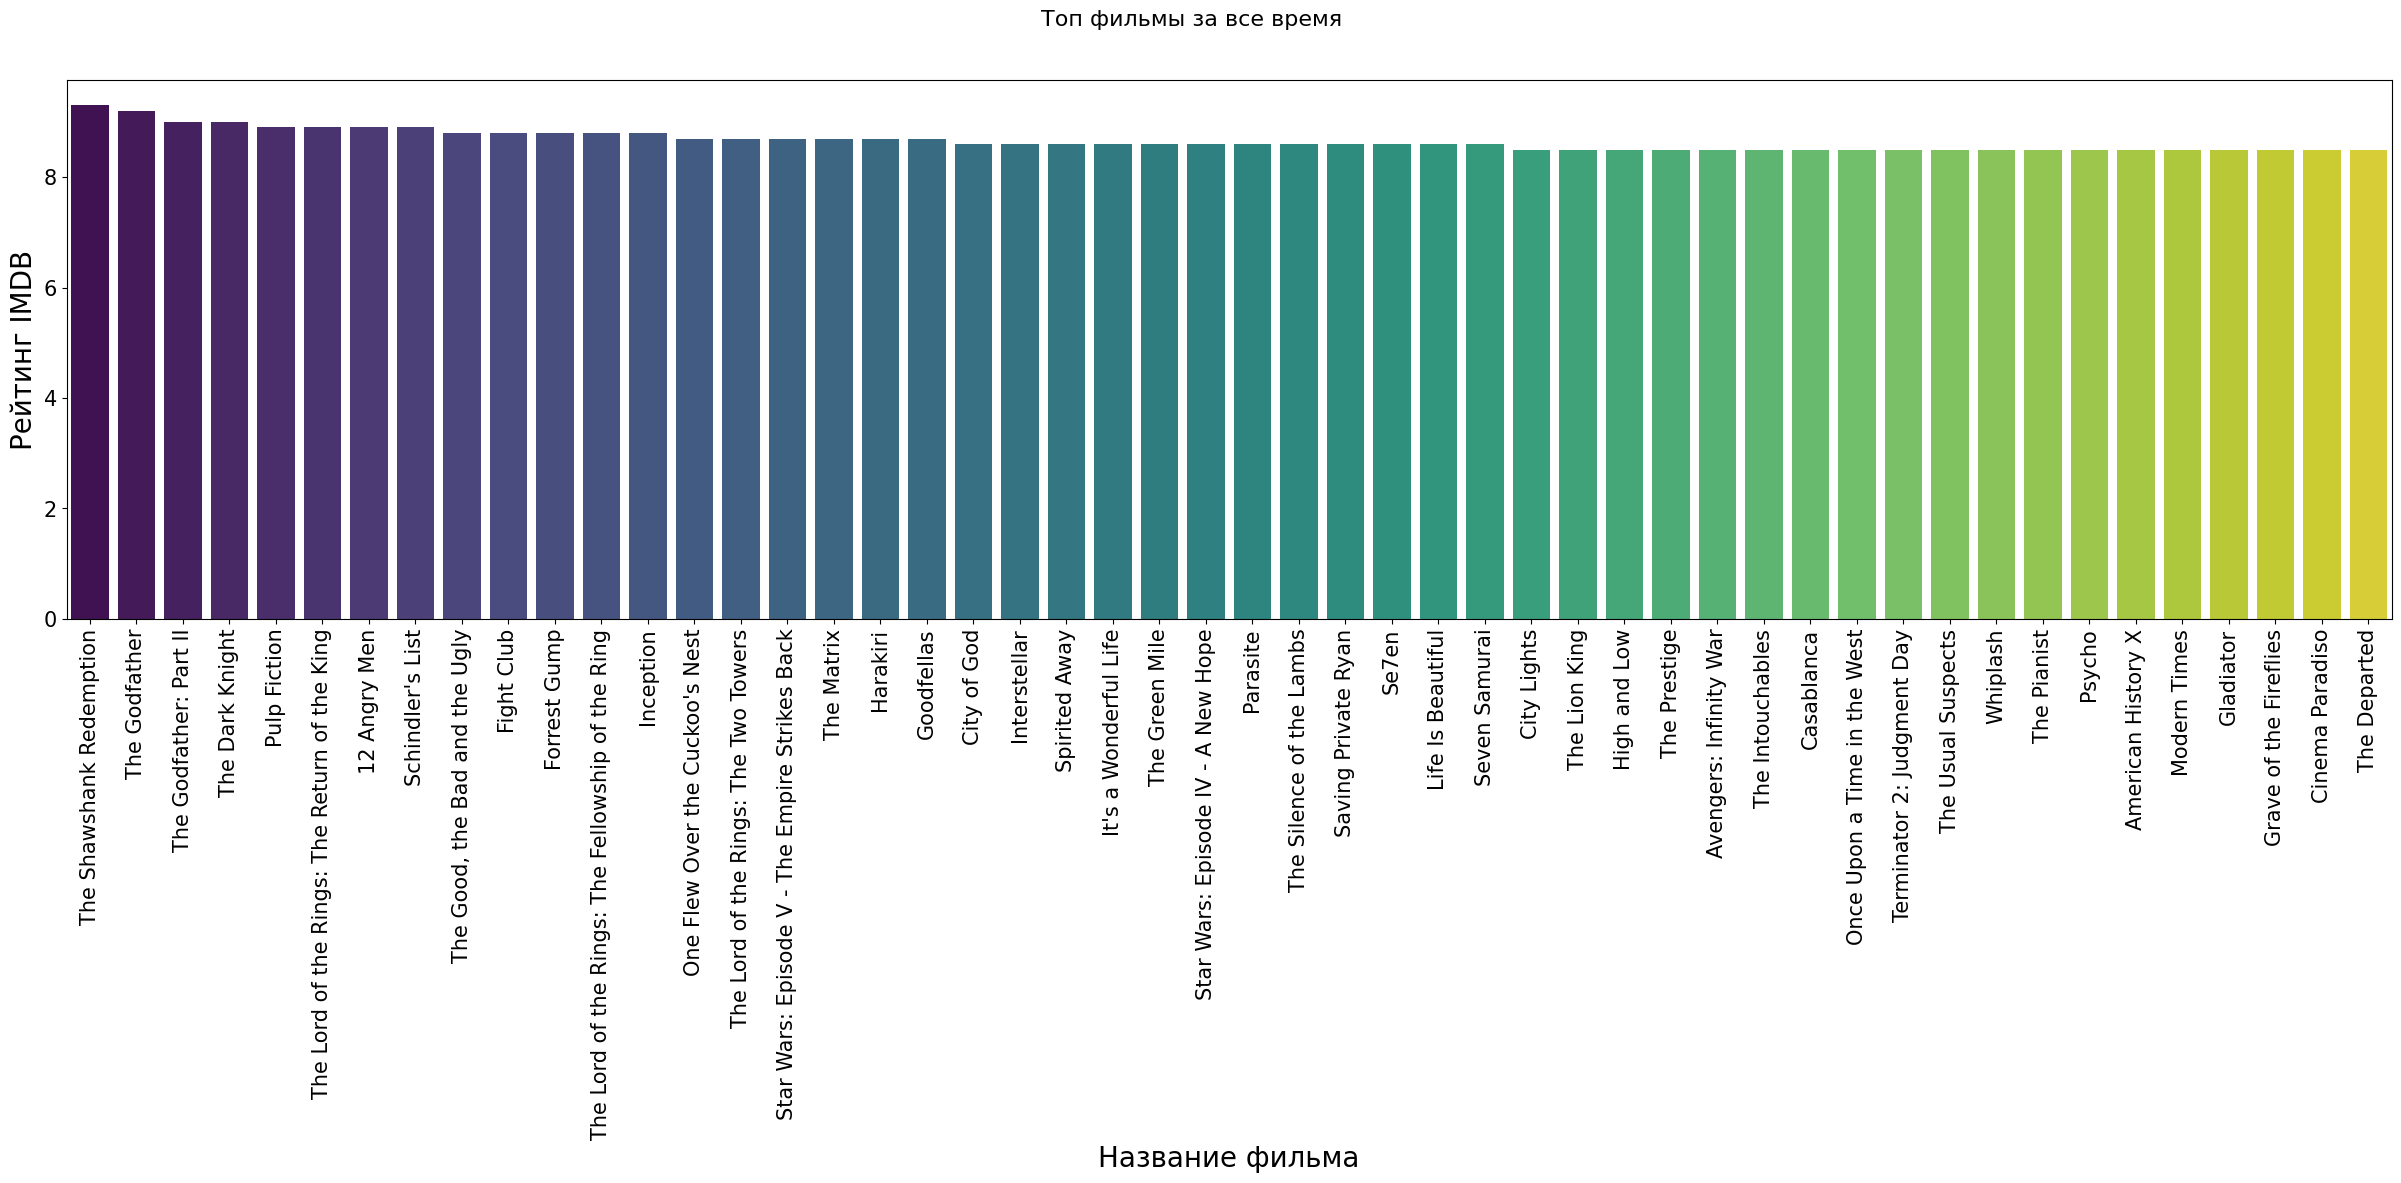

In [36]:
top_movies = movies.sort_values('imdb',ascending=False).head(50)
fig,ax = plt.subplots(figsize=(30, 7))
ax = sns.barplot(x='movie_name', y='imdb', data=top_movies,ci=None, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.suptitle('Топ фильмы за все время', fontsize=16)
ax.set_xlabel('Название фильма',fontsize=20)
ax.set_ylabel('Рейтинг IMDB',fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.show();


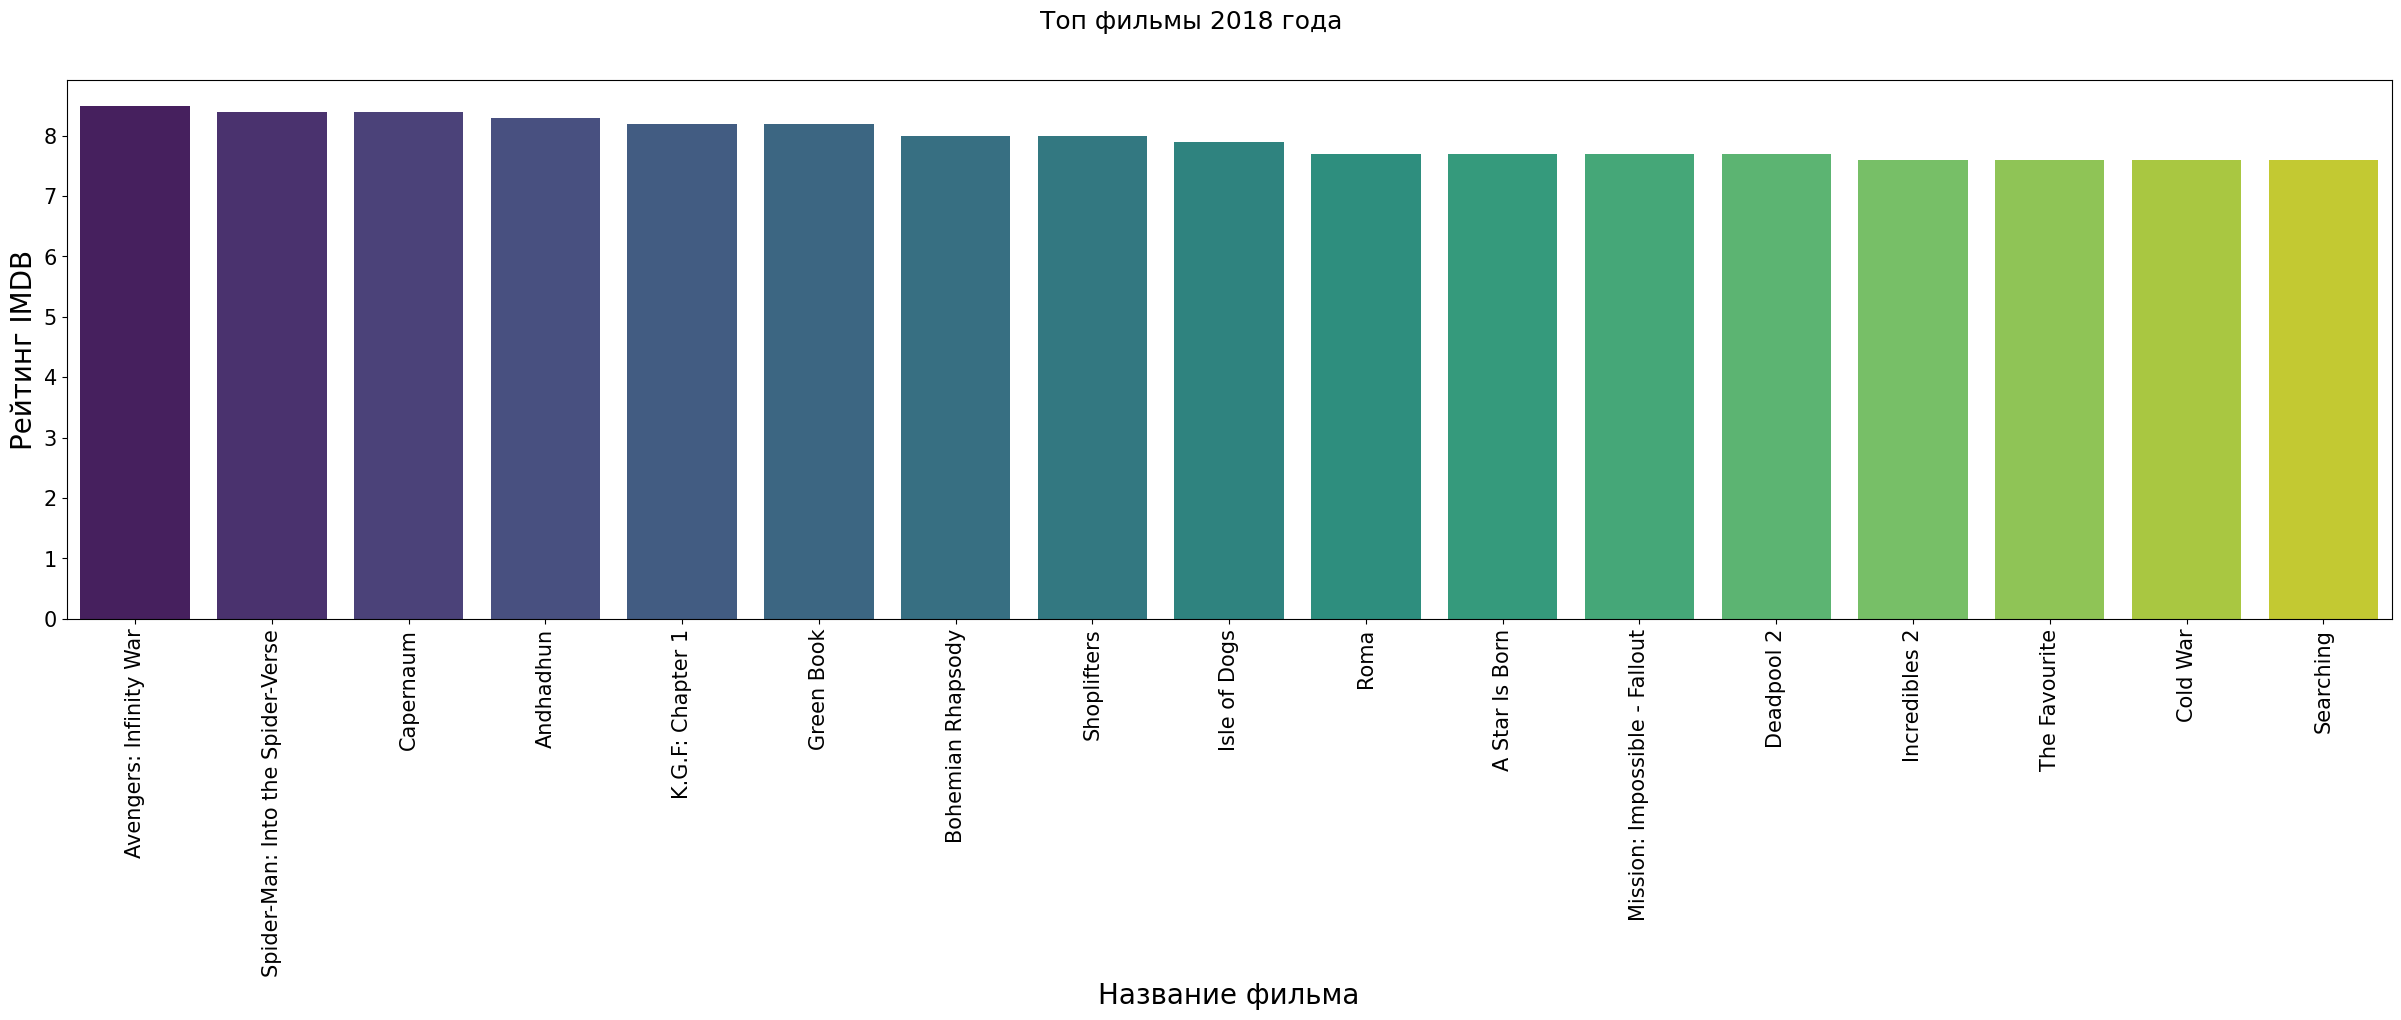

In [37]:
all_top_movies= movies.sort_values('imdb',ascending=False)
top_2018 = all_top_movies[all_top_movies['year'] == 2018]
fig,ax = plt.subplots(figsize=(30, 7))
ax = sns.barplot(x='movie_name', y='imdb', data=top_2018,ci=None,palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.suptitle('Tоп фильмы 2018 года', fontsize=18)
ax.set_xlabel('Название фильма',fontsize=20)
ax.set_ylabel('Рейтинг IMDB',fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.show();

## **3. Лучшие фильмы по рейтингу IMDB только за 2018 год.**

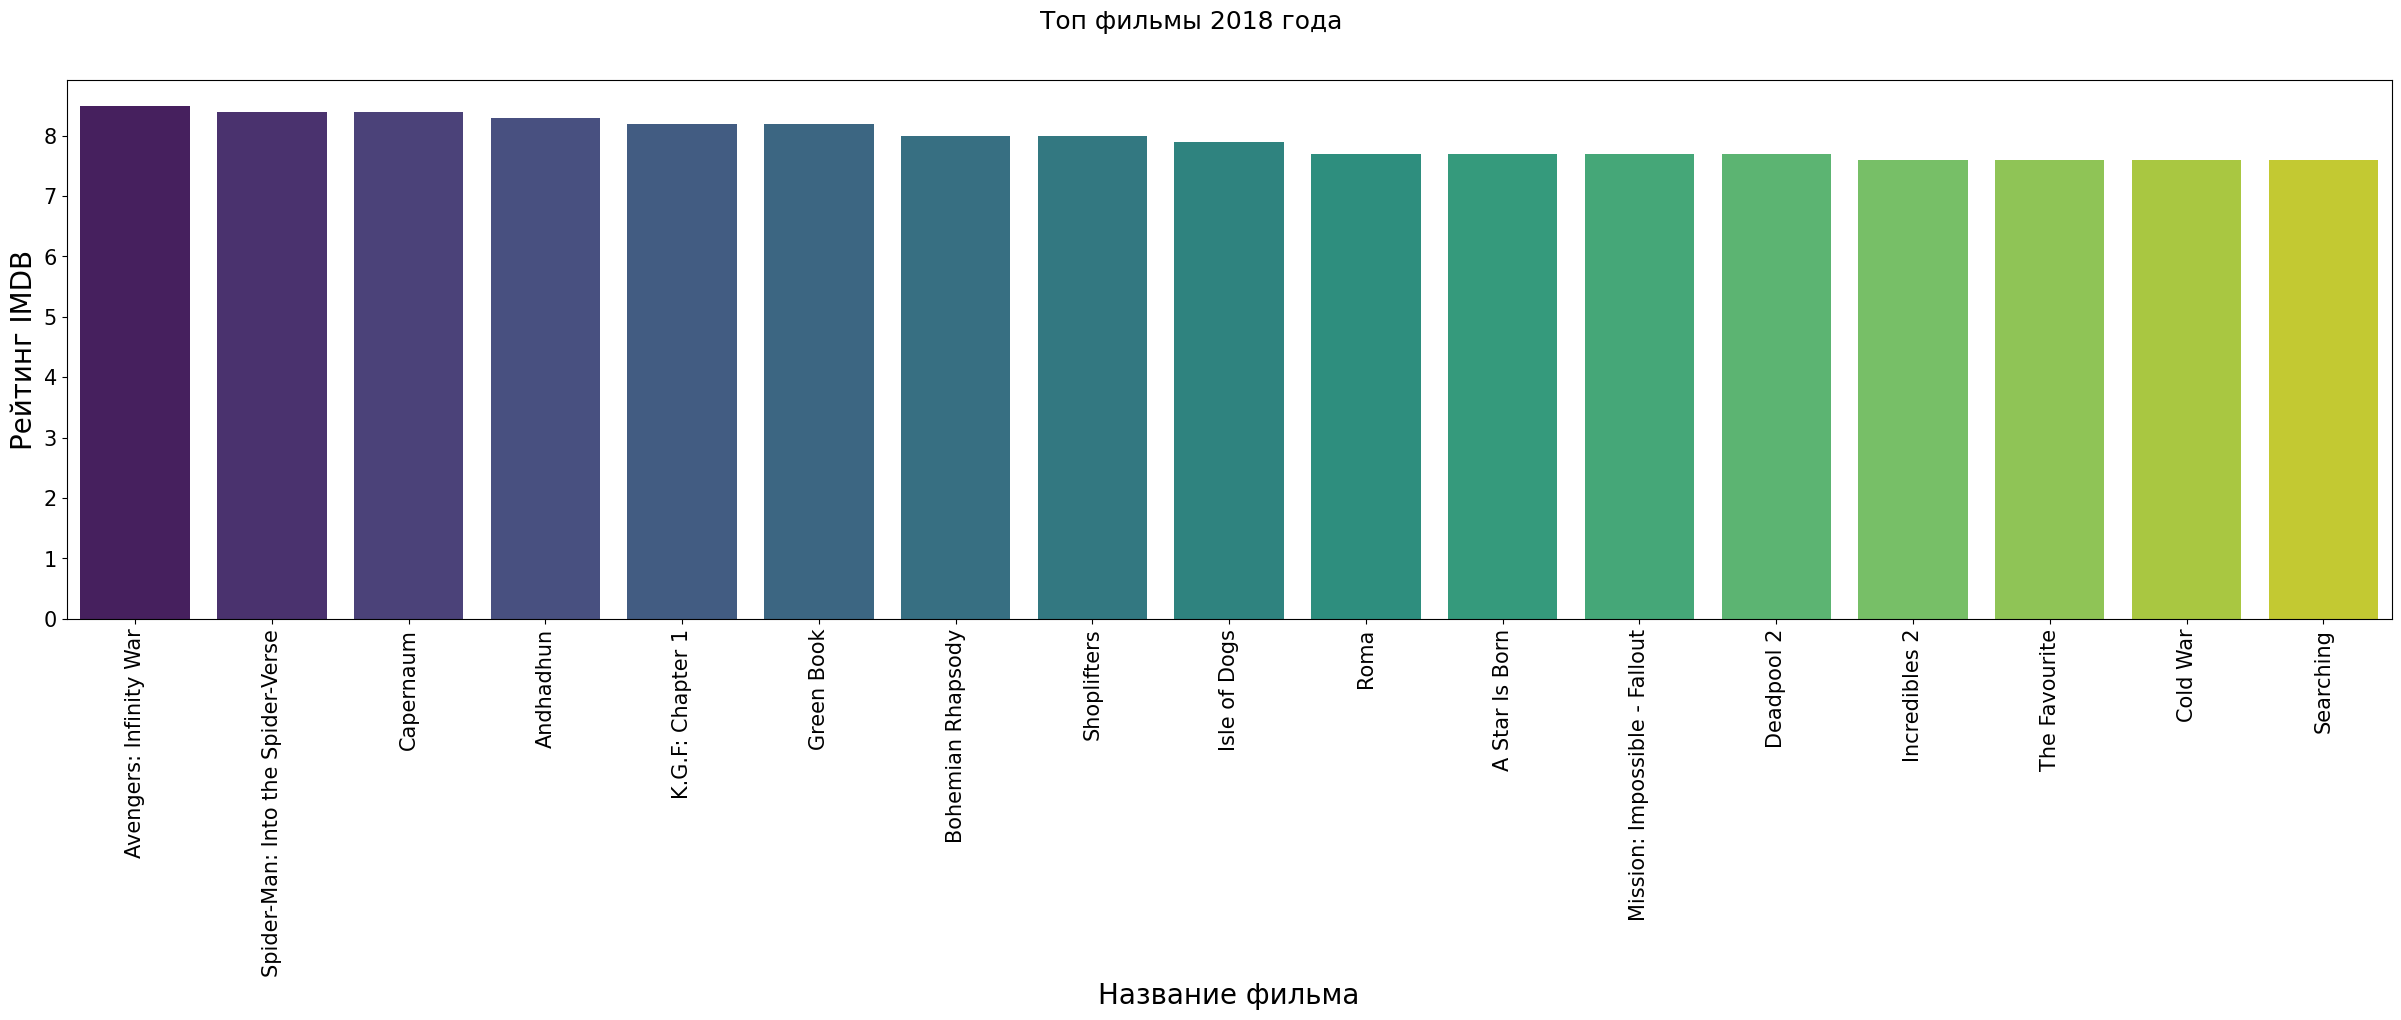

In [38]:
all_top_movies= movies.sort_values('imdb',ascending=False)
top_2018 = all_top_movies[all_top_movies['year'] == 2018]
fig, ax = plt.subplots(figsize=(30, 7))
ax = sns.barplot(x='movie_name', y='imdb', data=top_2018,ci=None,palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.suptitle('Tоп фильмы 2018 года', fontsize=18)
ax.set_xlabel('Название фильма',fontsize=20)
ax.set_ylabel('Рейтинг IMDB',fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.show()

## **4. Лучшие фильмы по рейтингу IMDB только за 2019 год.**

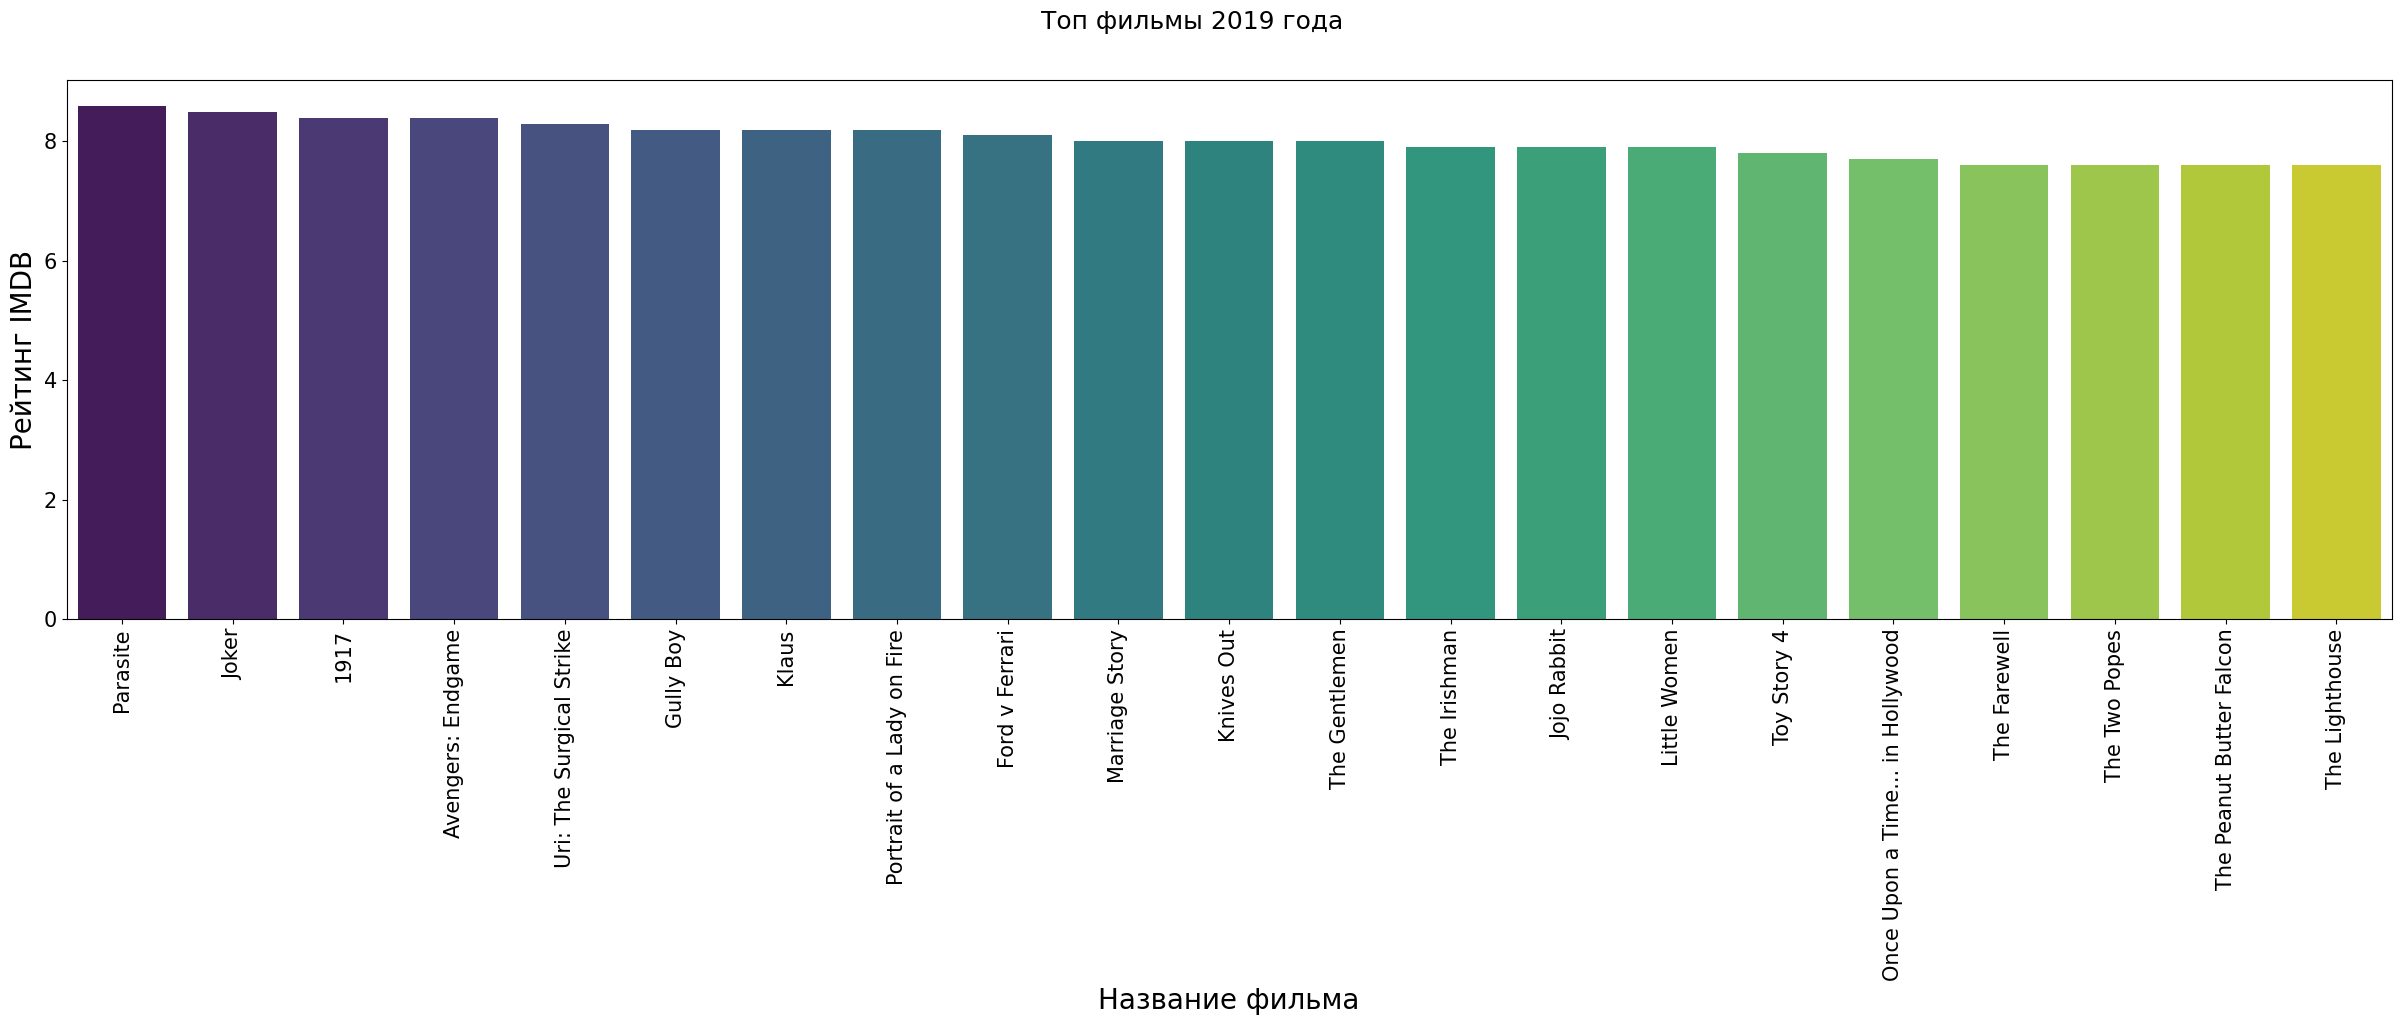

In [39]:
all_top_movies= movies.sort_values('imdb',ascending=False)
top_2019 = all_top_movies[all_top_movies['year'] == 2019]
fig, ax = plt.subplots(figsize=(30, 7))
ax = sns.barplot(x='movie_name', y='imdb', data=top_2019,ci=None,palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.suptitle('Tоп фильмы 2019 года', fontsize=18)
ax.set_xlabel('Название фильма',fontsize=20)
ax.set_ylabel('Рейтинг IMDB',fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.show()

## **5. 25 лучших фильмов по metascore.**

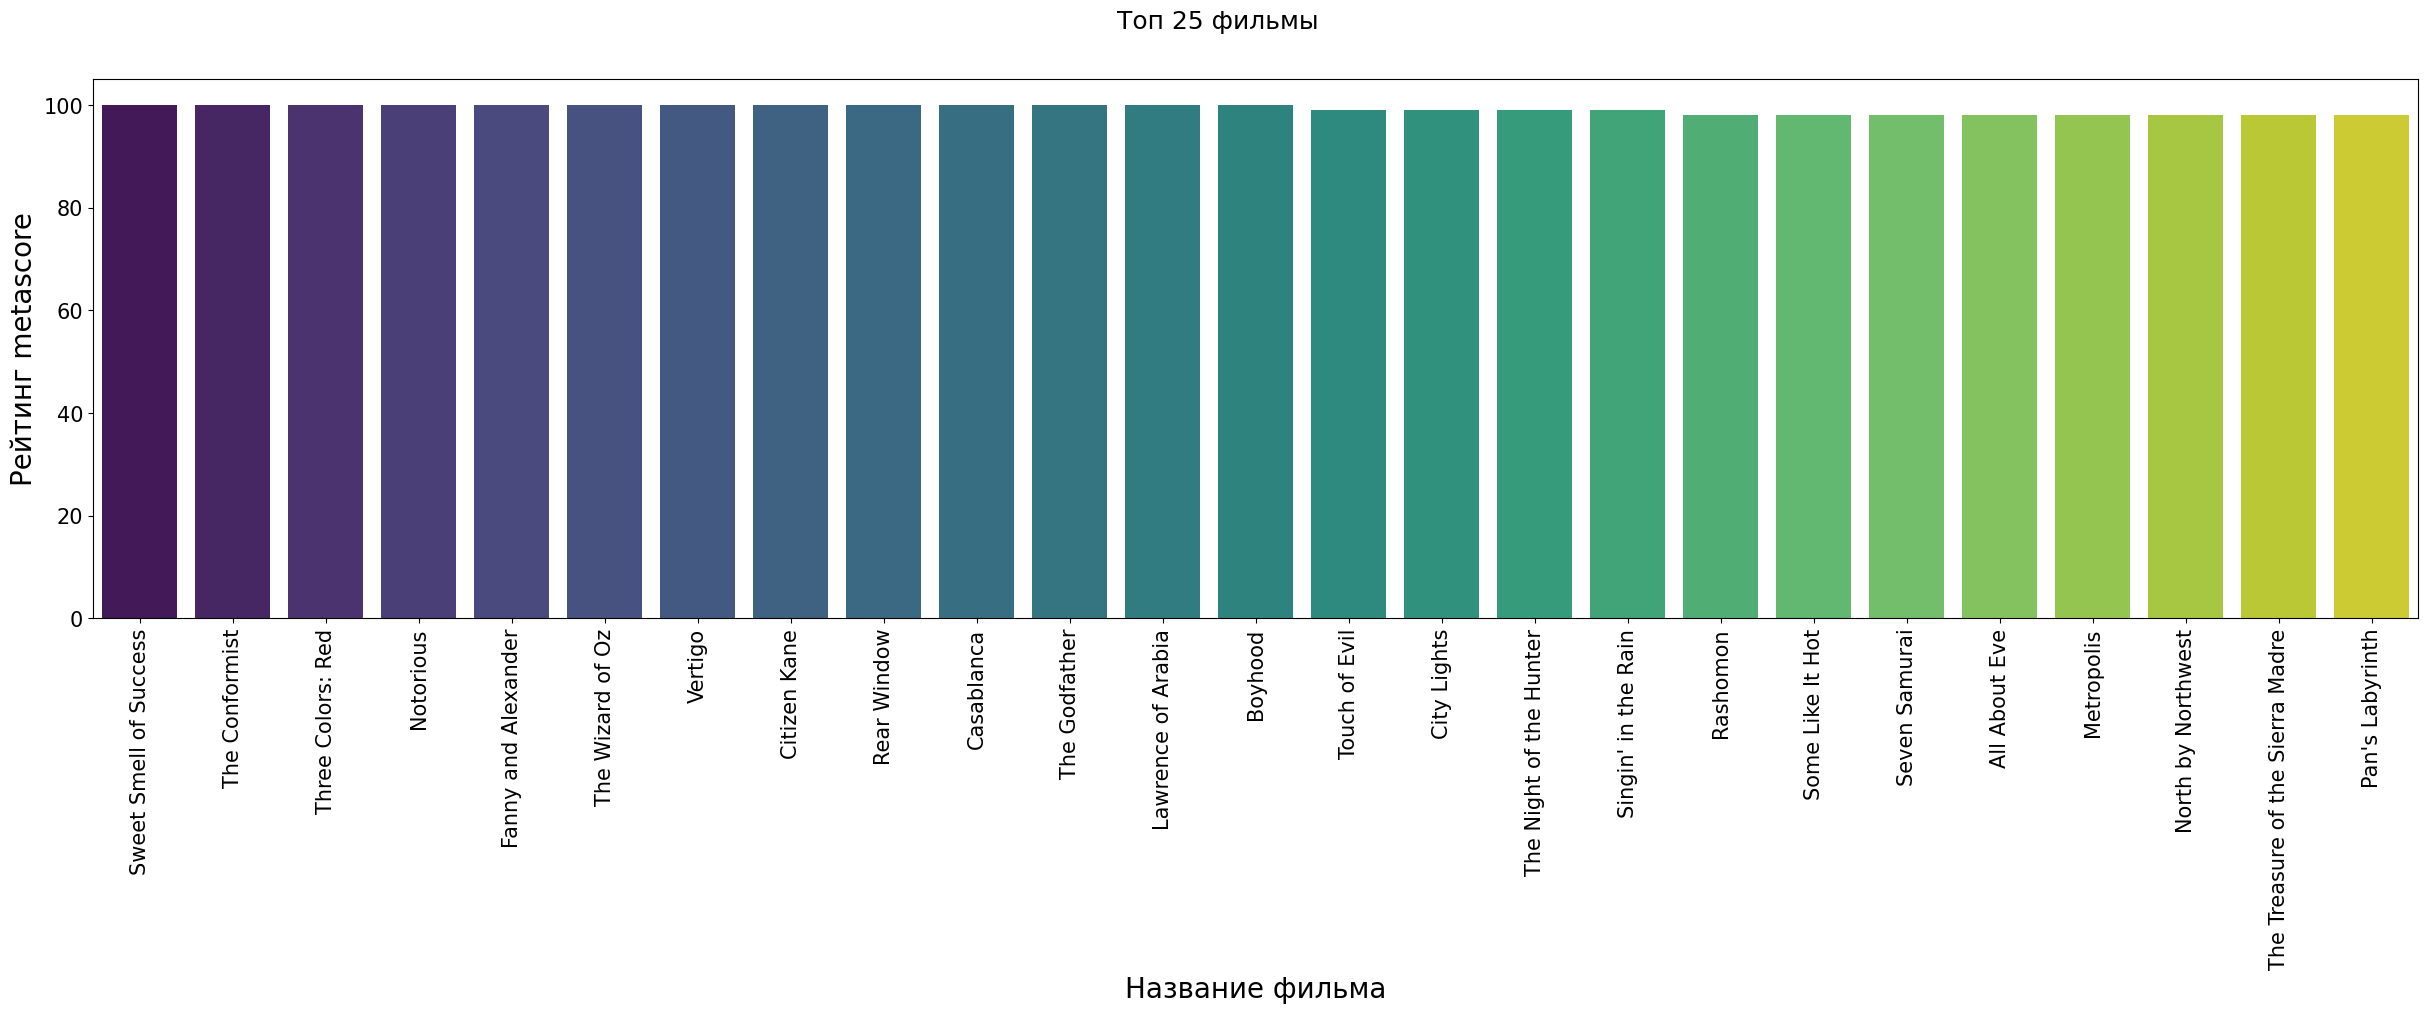

In [40]:
all_top_metascore_25= movies.sort_values('metascore',ascending=False).head(25)
fig, ax = plt.subplots(figsize=(30, 7))
ax = sns.barplot(x='movie_name', y='metascore', data=all_top_metascore_25 ,ci=None, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.suptitle('Tоп 25 фильмы', fontsize=18)
ax.set_xlabel('Название фильма',fontsize=20)
ax.set_ylabel('Рейтинг metascore',fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.show()

## **6. Лучшие фильмы на основе metascore за 2018 год.**

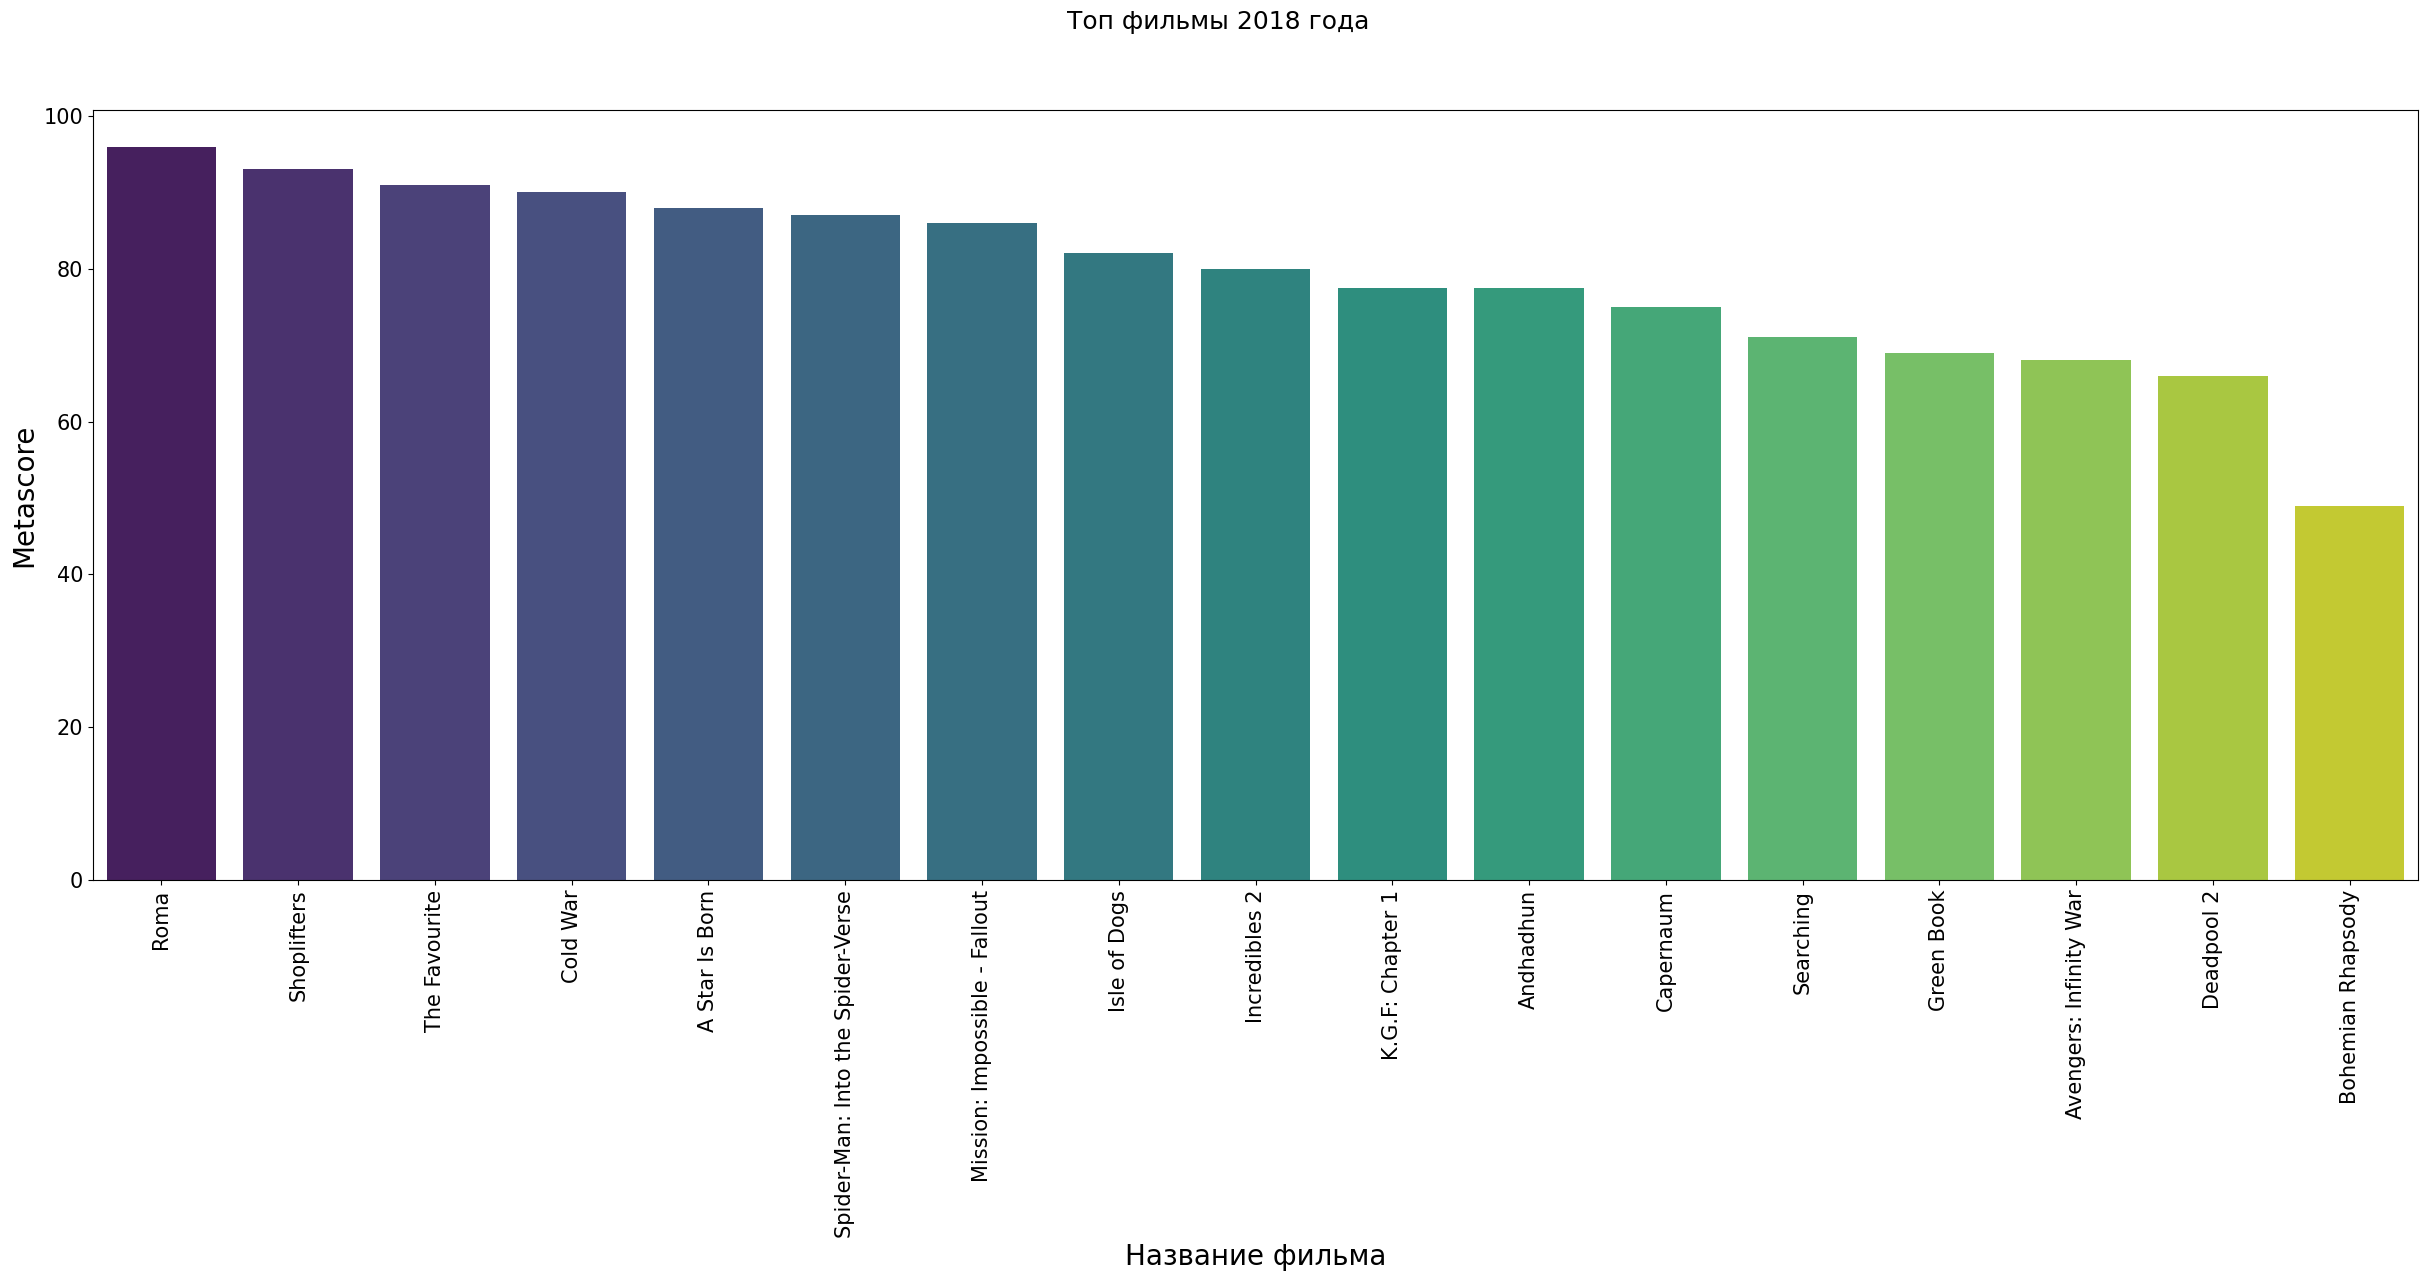

In [41]:
all_top_metascore=movies.sort_values('metascore',ascending=False)
fig, ax =plt.subplots(figsize=(30, 10))
ax = sns.barplot(x='movie_name', y='metascore', data=all_top_metascore[all_top_metascore['year'] == 2018] ,ci=None, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.suptitle('Tоп фильмы 2018 года', fontsize=18)
ax.set_xlabel('Название фильма', fontsize=20)
ax.set_ylabel('Metascore', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.show()

## **7. Лучшие фильмы на основе metascore за 2019 год.**

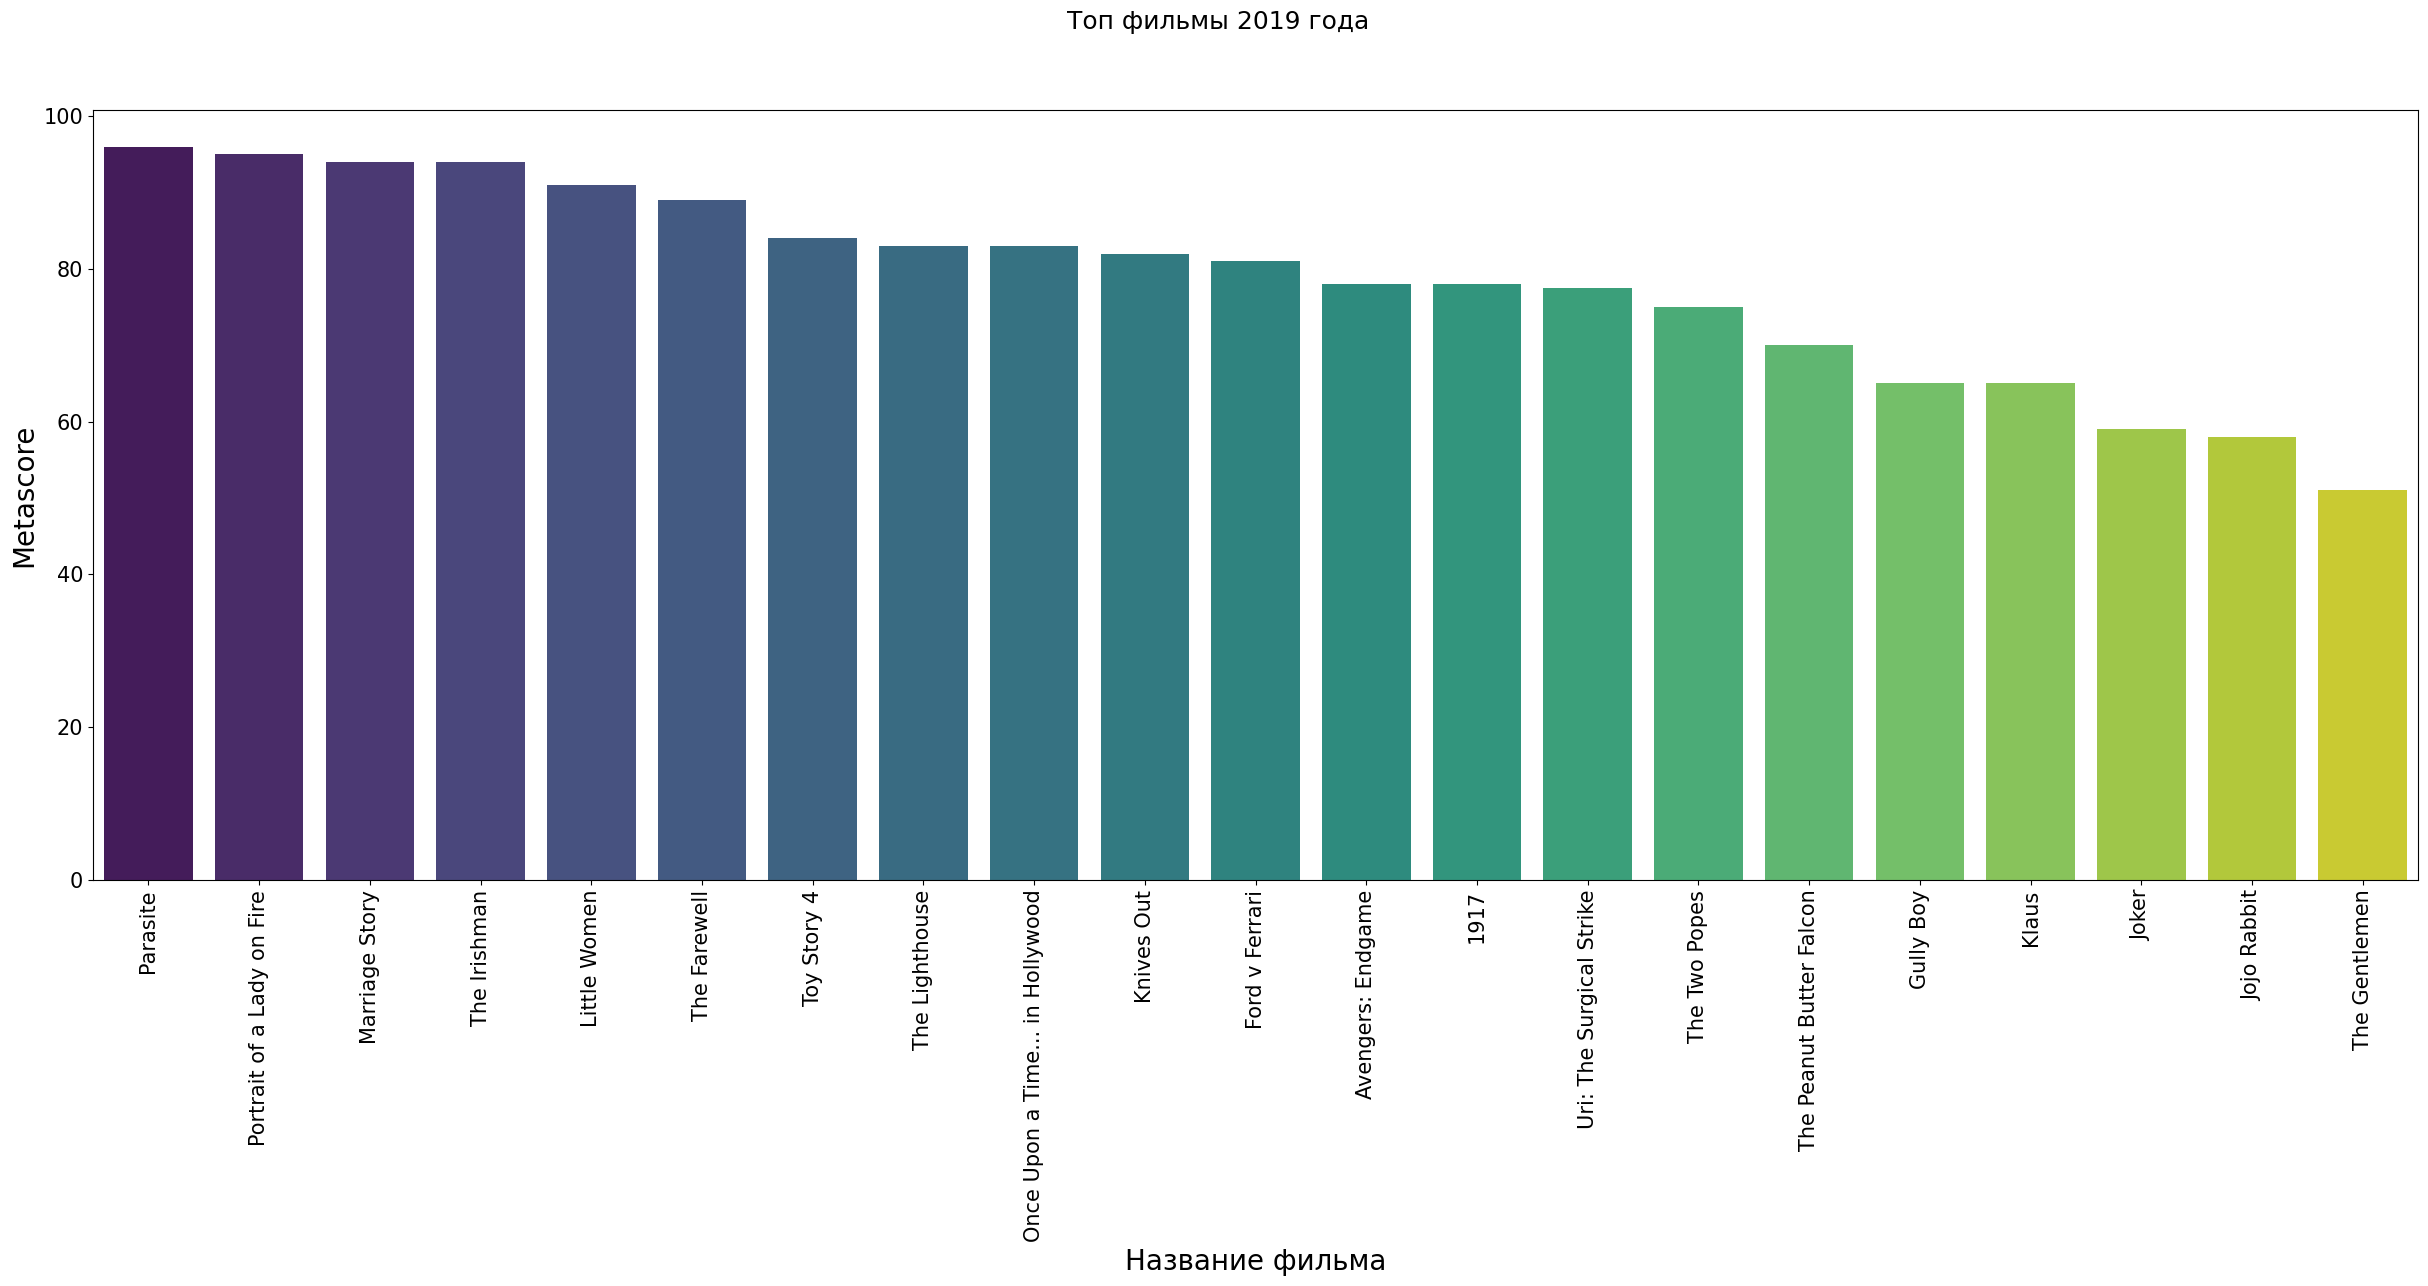

In [42]:
all_top_metascore = movies.sort_values('metascore', ascending=False)
fig, ax= plt.subplots(figsize=(30,10))
ax = sns.barplot(x='movie_name', y='metascore', data=all_top_metascore[all_top_metascore['year'] == 2019] ,ci=None, palette='viridis')
fig.suptitle('Tоп фильмы 2019 года', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Название фильма', fontsize=20)
ax.set_ylabel('Metascore', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.show()

## **8. Лучшие фильмы по кассовым сборам в США (в миллионах).**

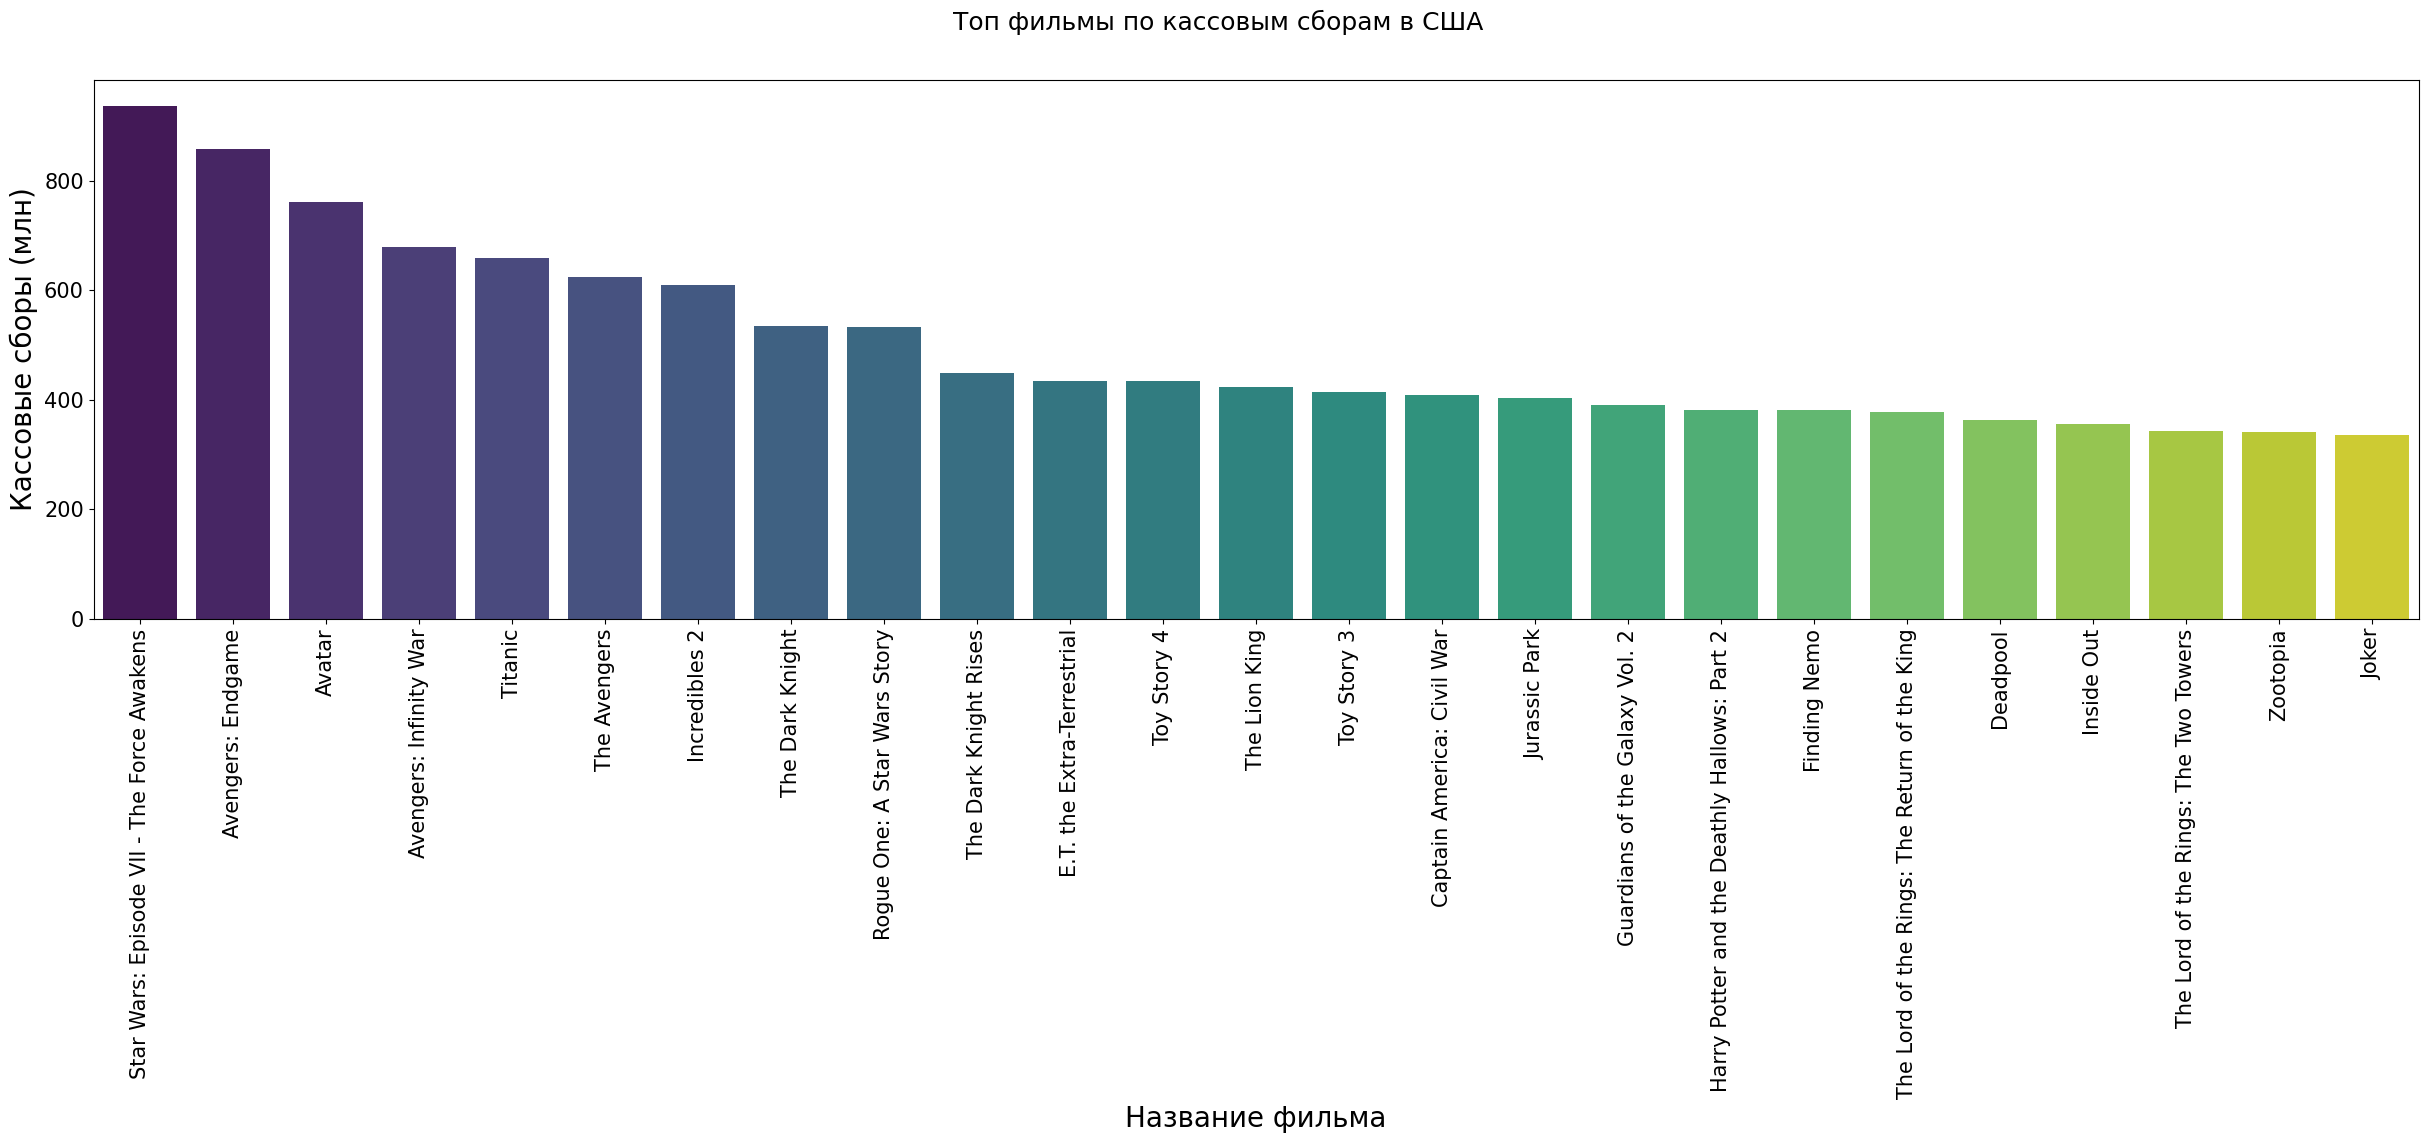

In [43]:
all_top_usgross_25= movies.sort_values('us_grossMillions', ascending=False).head(25)
fig,ax = plt.subplots(figsize=(30,7))
ax = sns.barplot(x = 'movie_name',  y = 'us_grossMillions', data=all_top_usgross_25, ci = None, palette='viridis' )
fig.suptitle('Топ фильмы по кассовым сборам в США', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Название фильма',fontsize=20)
ax.set_ylabel('Кассовые сборы (млн)',fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.show();


## **9. Лучшие фильмы по кассовым сборам в США (в миллионах) за 2018 год.**

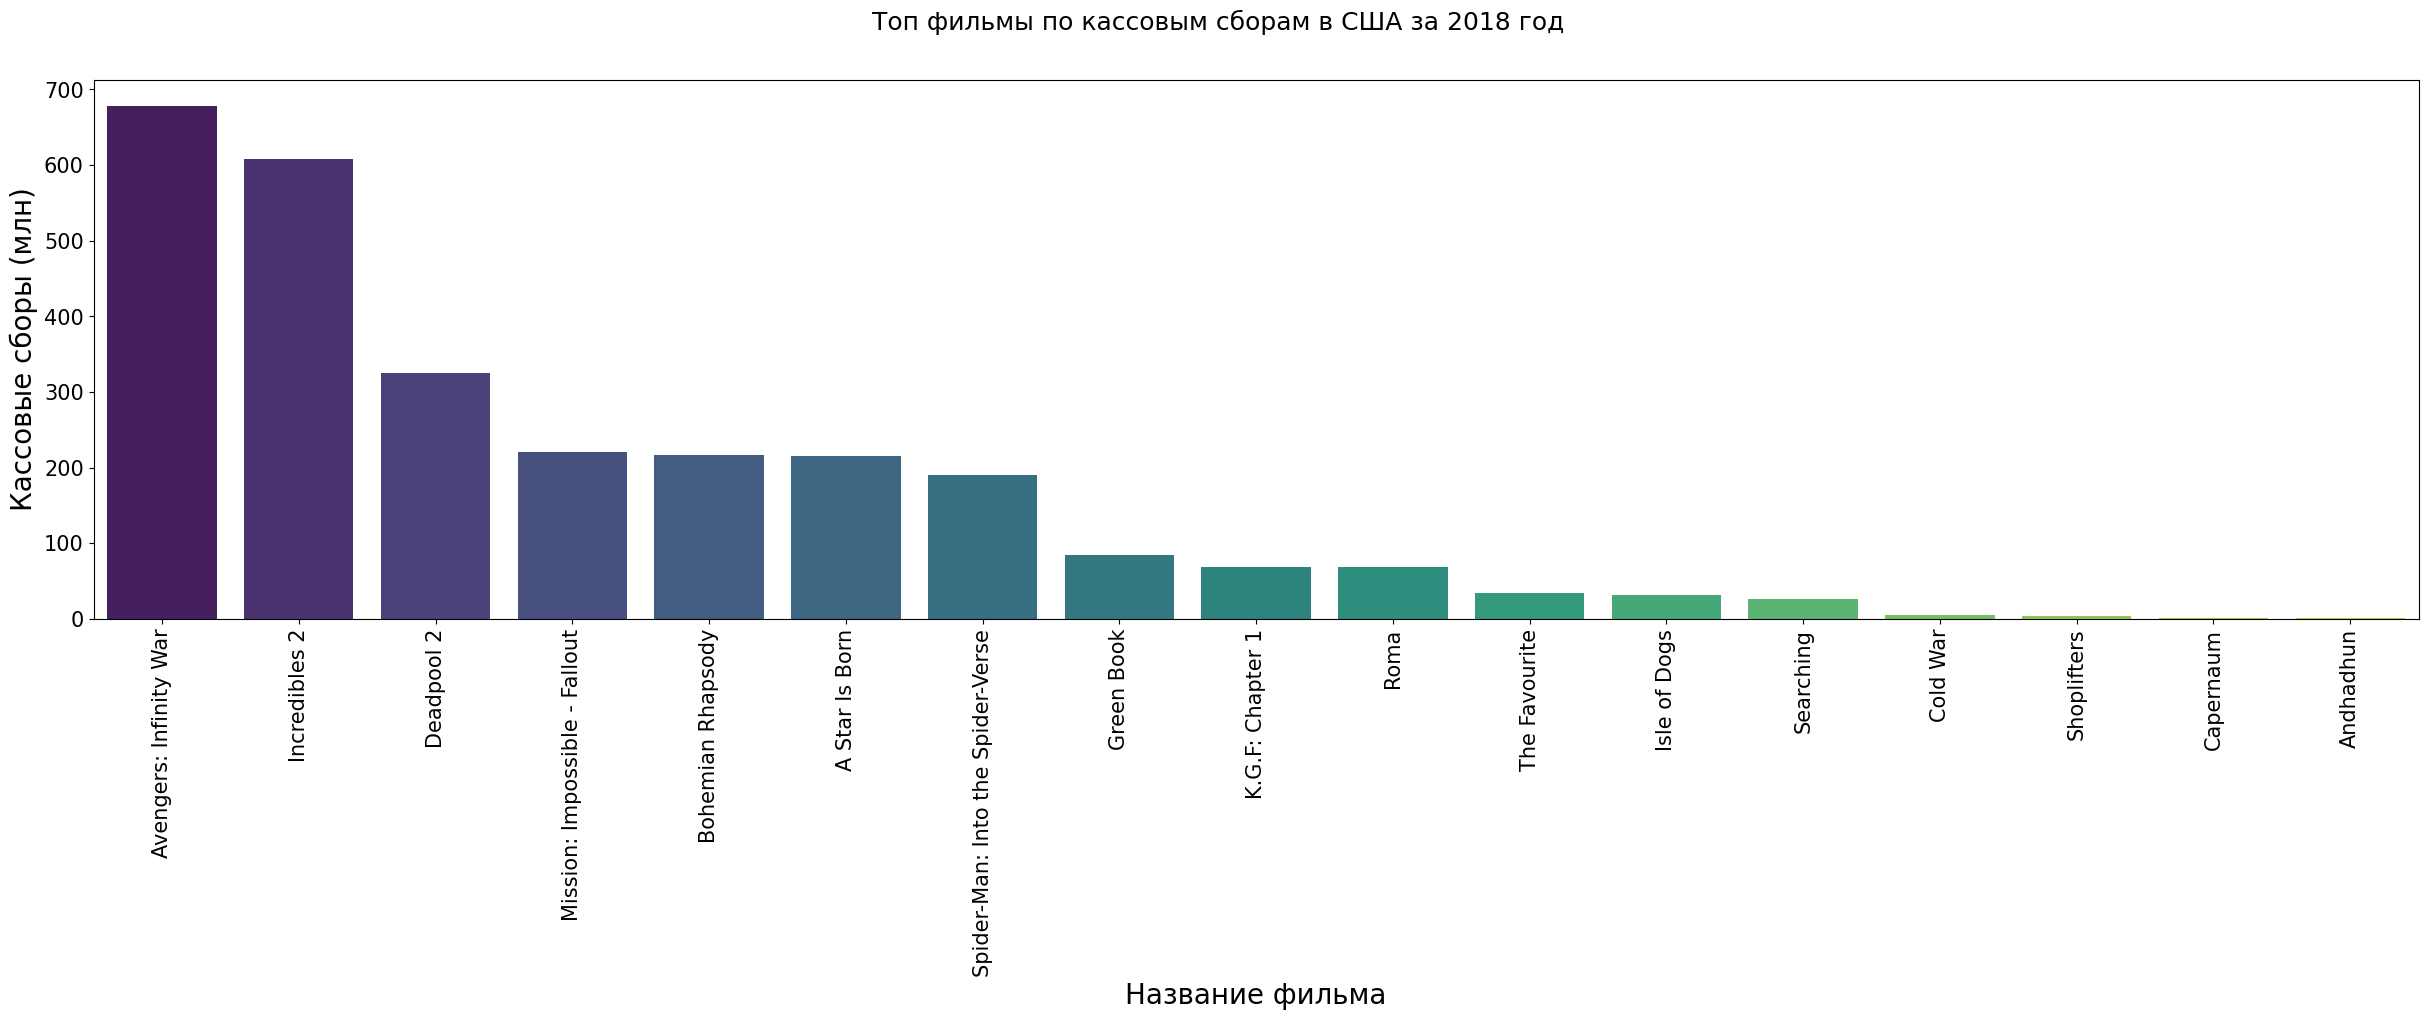

In [44]:
all_top_usgross = movies.sort_values('us_grossMillions',ascending=False)
top_2018_gross = all_top_usgross[all_top_usgross['year'] == 2018]
fig,ax = plt.subplots(figsize=(30, 7))
ax = sns.barplot(x='movie_name', y='us_grossMillions', data=top_2018_gross,ci=None, palette='viridis' )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.suptitle('Топ фильмы по кассовым сборам в США за 2018 год', fontsize=18)
ax.set_xlabel('Название фильма',fontsize=20)
ax.set_ylabel('Кассовые сборы (млн)',fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.show();

## **10. Лучшие фильмы по кассовым сборам в США (в миллионах) за 2019 год.**

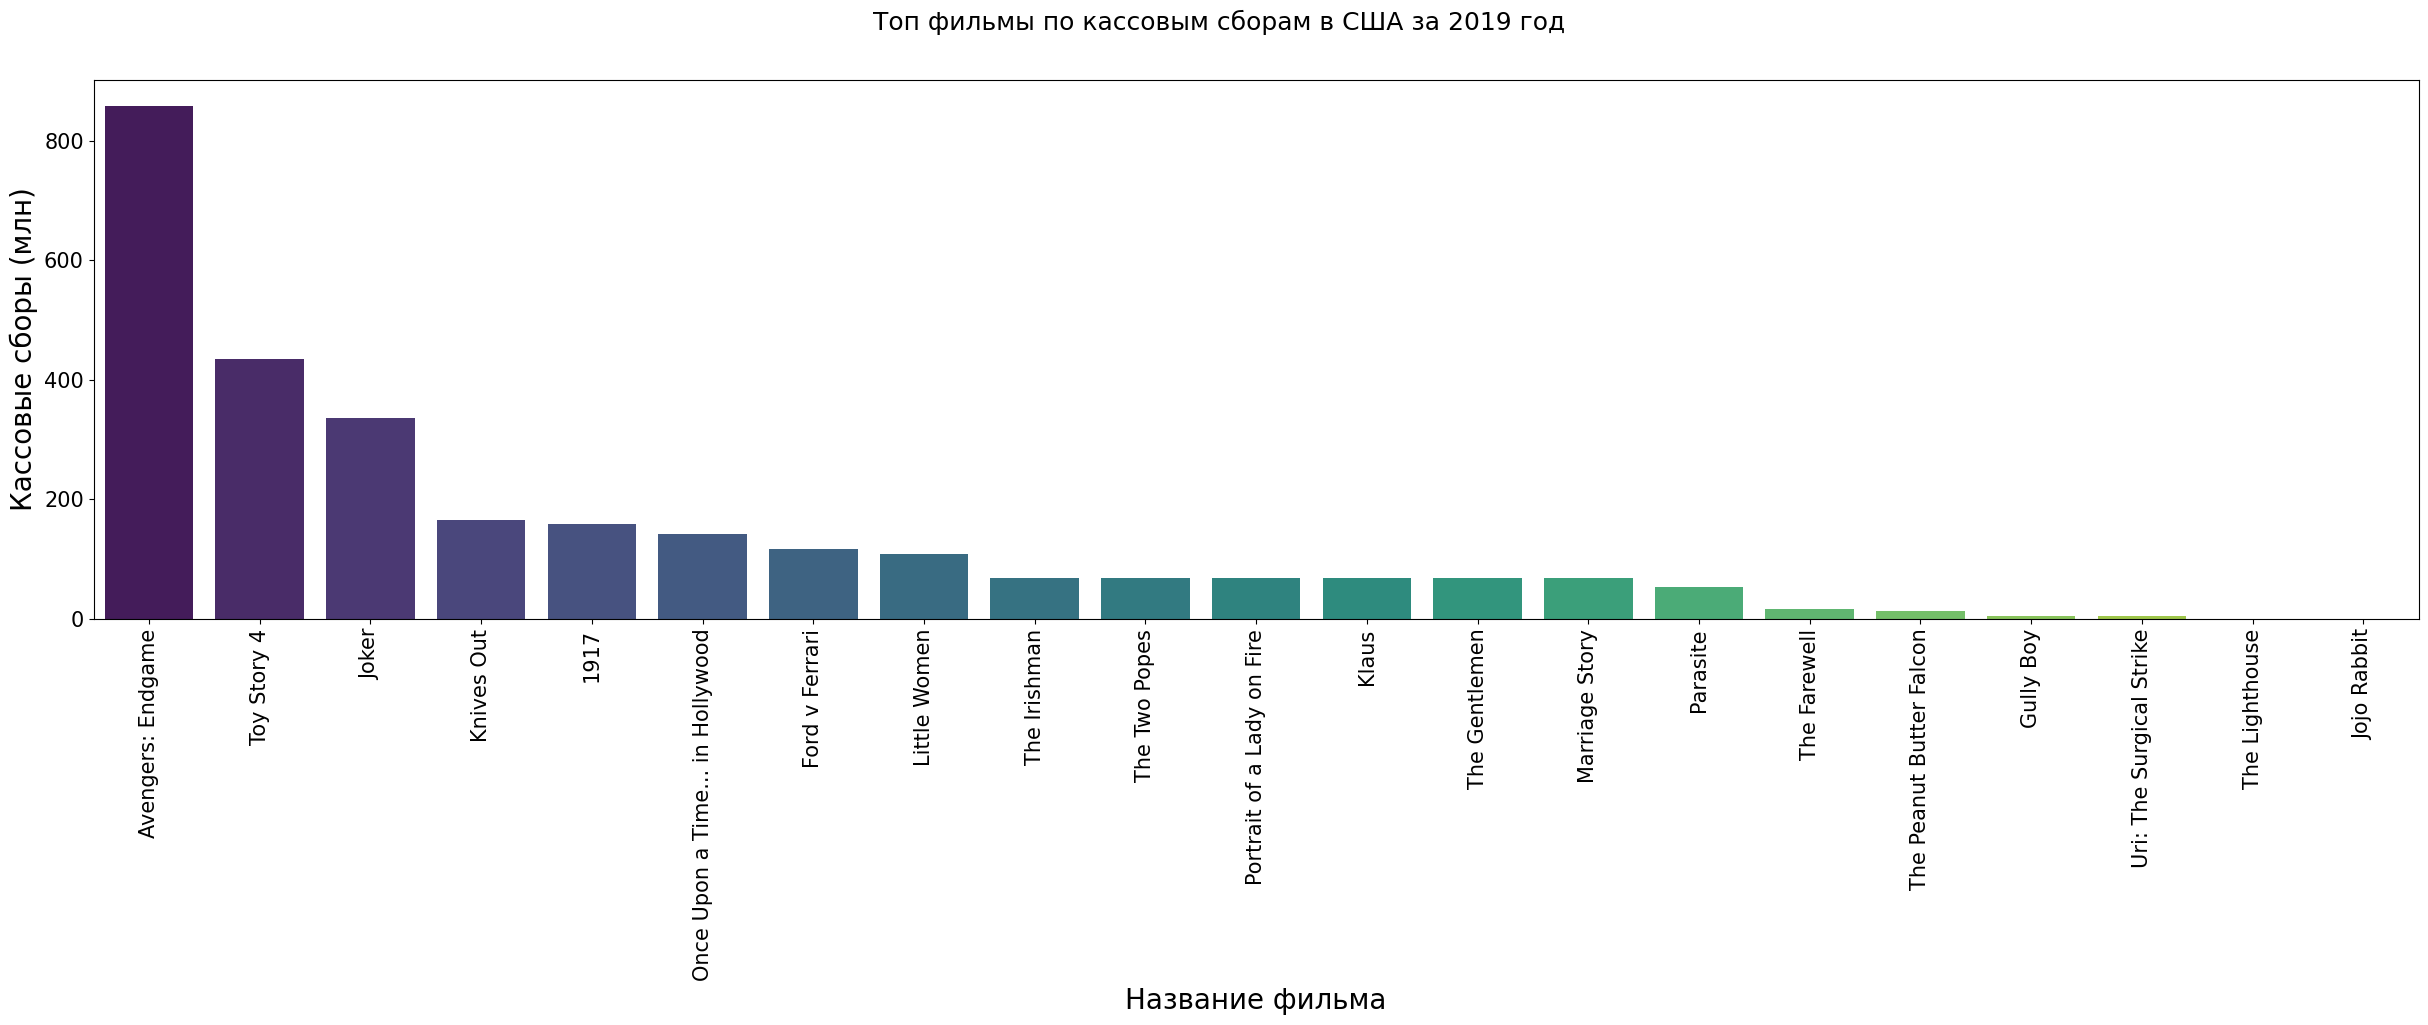

In [45]:
all_top_usgross = movies.sort_values('us_grossMillions',ascending=False)
top_2019_gross = all_top_usgross[all_top_usgross['year'] == 2019]
fig,ax = plt.subplots(figsize=(30, 7))
ax = sns.barplot(x='movie_name', y='us_grossMillions', data=top_2019_gross,ci=None, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.suptitle('Топ фильмы по кассовым сборам в США за 2019 год', fontsize=18)
ax.set_xlabel('Название фильма',fontsize=20)
ax.set_ylabel('Кассовые сборы (млн)',fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.show();